# 911 Call Data (Kaggle)

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

In [50]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

** Read in the csv file as a dataframe called df **

In [51]:
df = pd.read_csv("911.csv")

In [52]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


** Check the info() of the df **

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


** Check the head of df **

In [54]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


----
## Initial Research Questions

**What are the top 5 zipcodes for 911 calls?**

In [55]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [56]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

**how many unique title codes are there?**

In [57]:
len(df['title'].unique())

110

----
## Creating new features

**create a reasons column for EMS, Fire, and Traffic by using the .apply() method** 

In [58]:
df['Reason'] = df['title'].apply(lambda x: x.split(':')[0])

**Research Question: What is the most common Reason for a 911 calls in this region? (Numerically & graphically)**

In [59]:
df['Reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: Reason, dtype: int64

<AxesSubplot:xlabel='Reason', ylabel='count'>

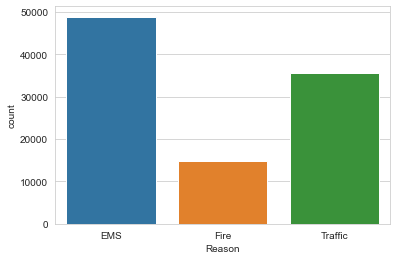

In [60]:
sns.set_style('whitegrid')
sns.countplot(x= 'Reason', data = df)

----
**The next features we need to create are time features. Specifically, hour, month & day of the week. This allows us to understand the frequency of 911 calls on a daily, weekly & monthly basis. Use inbuild (pd.to_datatime)**

In [61]:
time = pd.to_datetime(df['timeStamp'])

In [78]:
Hour = time.apply(lambda x: x.hour)
Month = time.apply(lambda x: x.month)
Day_of_Week = time.apply(lambda x: x.day_of_week)
Date = time.apply(lambda x: x.date())

In [84]:
df['Hour'] = Hour
df['Month'] = Month
df['Day_of_Week'] = Day_of_Week
df['Date'] = Date

**Convert Day of Week from 0-6 to Mon-Sun using .map() and dmap dictionary**

In [87]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [88]:
Day_of_Week = Day_of_Week.map(dmap)

In [90]:
df['Day_of_Week'] = Day_of_Week
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Month,Day_of_Week,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


**Research Question: What is the frequency of each reason on each day of the week in 2016?**

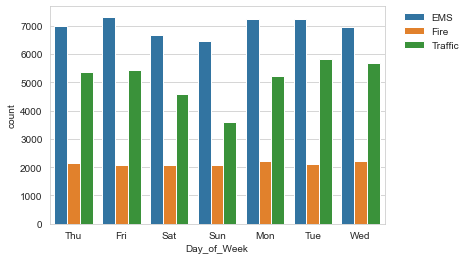

In [40]:
sns.countplot(x= 'Day_of_Week', hue = 'Reason', data = df)
plt.legend(bbox_to_anchor = (1.03,1.01), loc = 2, edgecolor = 'white')

**Research Question: What is the frequency of each reason in each Month in 2016?**

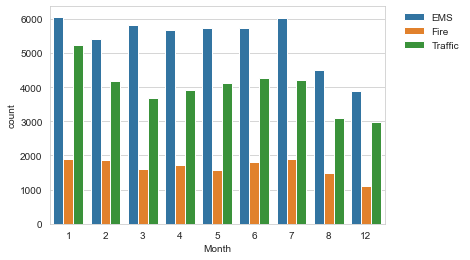

In [41]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor = (1.03,1.01), loc = 2, edgecolor = 'white')

**Research Question: How many 911 calls did the dispatcher receive per day in 2016?**

In [92]:
byDate = df.groupby('Date').count()

<AxesSubplot:xlabel='Date'>

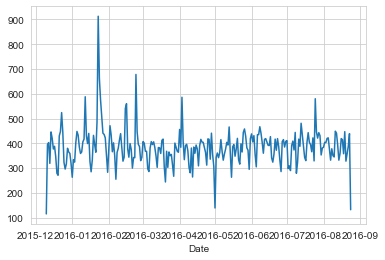

In [93]:
byDate['twp'].plot()

*Getting Specific*

**Research Question: How many *EMS* calls did the dispatcher receive per day?**

<AxesSubplot:title={'center':'EMS'}, xlabel='Date'>

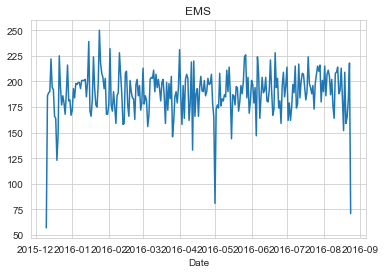

In [94]:
EMS = df[df['Reason']=='EMS'].groupby('Date').count()
EMS['twp'].plot(title = 'EMS')

**Research Question: How many *TRAFFIC* calls did the dispatcher receive per day?**

<AxesSubplot:title={'center':'Traffic'}, xlabel='Date'>

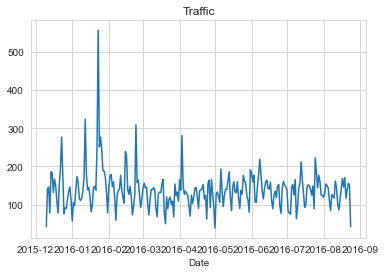

In [95]:
Traffic = df[df['Reason']=='Traffic'].groupby('Date').count()
Traffic['twp'].plot(title = 'Traffic')

**Research Question: How many *FIRE* calls did the dispatcher receive per day?**

<AxesSubplot:title={'center':'Fire'}, xlabel='Date'>

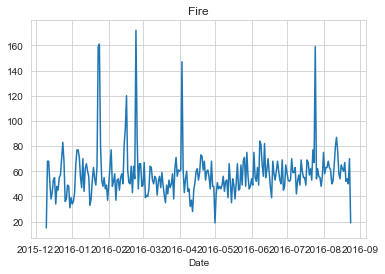

In [96]:
Fire = df[df['Reason']=='Fire'].groupby('Date').count()
Fire['twp'].plot(title = 'Fire')

**By recreating the below plot, it can be noticed that Months 9, 10 & 11 are missing! Lets try to find a good approximation model to help fill in this information**

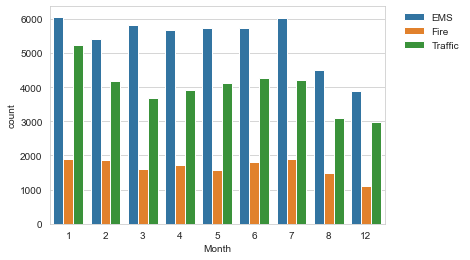

In [97]:
sns.countplot(x = 'Month', data = df, hue = 'Reason')
plt.legend(bbox_to_anchor = (1.03,1.01), loc = 2, edgecolor = 'white')

**Step1: Create a Dataframe where we get the count of calls per month using groupby month & .count () for aggregation**

In [22]:
byMonth = df.groupby('Month').count()
byMonth

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Hour,Day_of_Week
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


**Step 2: Plot Month vs count of calls per month for initial visulization**

<AxesSubplot:xlabel='Month'>

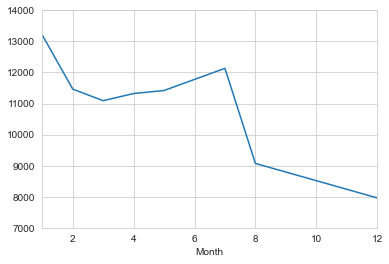

In [128]:
byMonth['twp'].plot(ylim = (7000,14000), xlim = (1,12))

**Step 3: Use seaborn's inbuilt linear fit model lmplot()**

(1.0, 12.0, 6000.0, 14000.0)

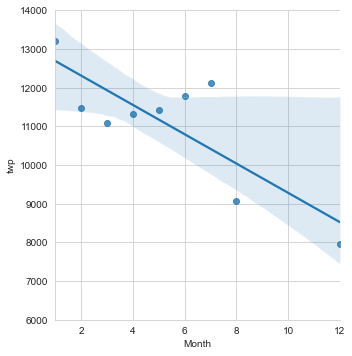

In [137]:
sns.lmplot(x='Month', y = 'twp', data = byMonth.reset_index())
plt.axis([1,12,6000,14000])

**Not the best fit due to the rise in calls in June & July. A better model to apply here would be the cubic spline interpolation model where the model would create an equation to describe the behavoir between each two points in the graph without being affected by other parts of the data** 

____
**Research Question: What is the frequency of 911 calls each hour of each day of a week throughout 2016?**

This will give us the pattern of incoming calls in a given week. Things like busiest hours & busiest days. The best tool for this is a heatmap. 

**Step1: First we'll need to restructure the dataframe so that the columns at hours & the index becomes the Day of the Week. I'll use the groupby and unstack() to accomplish this**

In [98]:
#Columns = Hours | Rows = Day of Week
dayhour = df.groupby(by = ['Day_of_Week', 'Hour']).count()['lat'].unstack()
dayhour.head()

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day_of_Week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354


**Step2: Use seaborn heatmap usig viridis colormap**

<AxesSubplot:xlabel='Hour', ylabel='Day_of_Week'>

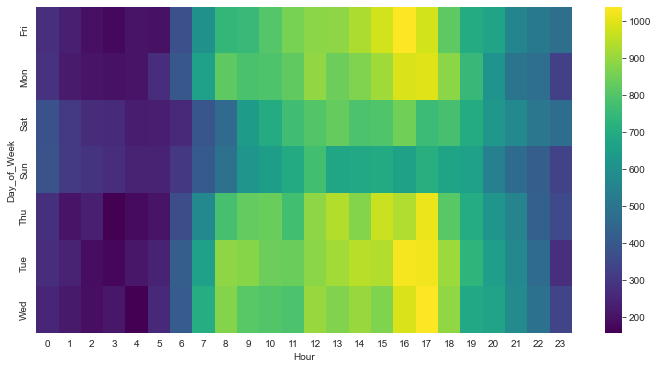

In [99]:
plt.figure(figsize = (12,6))
sns.heatmap(dayhour, cmap = 'viridis')

**Follow Up Research Question: lets repeat the above! But this time I want to know What is the frequency of 911 calls each *Month* of each day of a week throughout 2016? let follow the same steps above**


**Step1: Restructure the dataframe so that the columns are Month & the index becomes the Day of the Week**

In [104]:
daymonth = df.groupby(by = ['Day_of_Week', 'Month']).count()['lat'].unstack()
daymonth.head()

Month,1,2,3,4,5,6,7,8,12
Day_of_Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266


**Step2: Use seaborn heatmap usig viridis colormap**

<AxesSubplot:xlabel='Month', ylabel='Day_of_Week'>

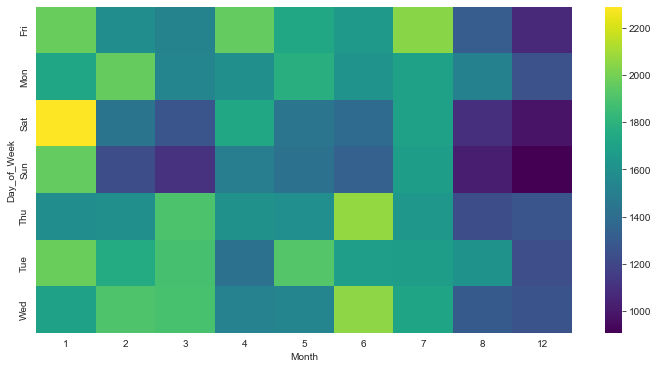

In [105]:
plt.figure(figsize = (12,6))
sns.heatmap(daymonth, cmap = 'viridis')

**Now Lets create clustermaps for each of the Restructured Dataframes**

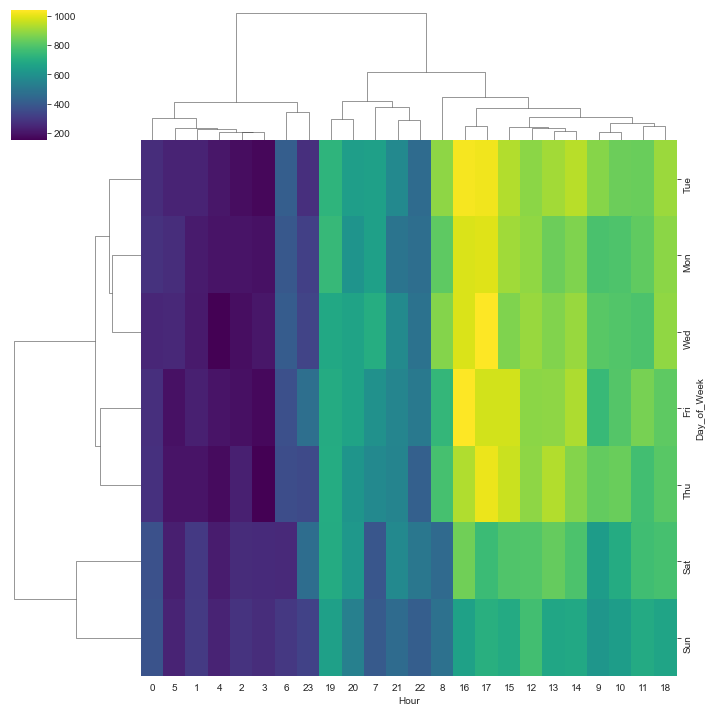

In [77]:
sns.clustermap(dayhour, cmap = 'viridis')

** Now repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

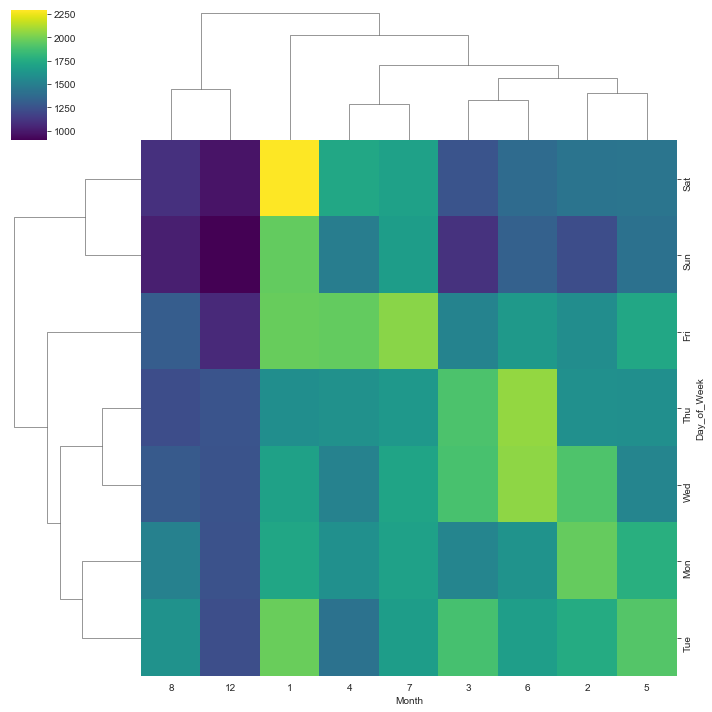

In [83]:
sns.clustermap(daymonth, cmap = 'viridis')